# Package

In [ ]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#SERIE AND ARIMA MODEL LIBRARIES
from pandas import Series
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

# Data

2019: 365 X 24 (8760) 
2020: 366 X 24 (8784) 
2021: 120 X 24 (2880)

In [ ]:
data = pd.read_csv(r'C:\Users\Hsuan\OneDrive - National Chiao Tung University\NYCUAIML\再生能源規劃\信義國泰\data_NA.csv')
data

,Year,Month,Season,Day,Weekday,Weekend,Hour,Temperature,Pressure,Humidity,Wind_Speed,Wind_Direction,Rainfall,Load
0,2019,1,4,1,2,0,0,15.3,1020.3,97.0,2.0,77.0,0.5,1773.6
1,2019,1,4,1,2,0,1,15.3,1020.0,97.0,2.1,80.0,1.0,1675.2
2,2019,1,4,1,2,0,2,15.3,1019.4,97.0,2.3,78.0,0.5,1677.6
3,2019,1,4,1,2,0,3,15.3,1019.2,97.0,2.2,71.0,0.0,1706.4
4,2019,1,4,1,2,0,4,15.2,1019.2,97.0,1.9,76.0,0.5,1665.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20419,2021,4,1,30,5,0,19,24.1,1004.0,75.0,0.1,0.0,0.0,2404.8
20420,2021,4,1,30,5,0,20,23.4,1004.2,77.0,0.0,0.0,0.0,2275.2
20421,2021,4,1,30,5,0,21,22.8,1004.3,74.0,0.0,0.0,0.0,1987.2
20422,2021,4,1,30,5,0,22,22.5,1003.9,73.0,0.4,242.0,0.0,1720.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20424 entries, 0 to 20423
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            20424 non-null  int64  
 1   Month           20424 non-null  int64  
 2   Season          20424 non-null  int64  
 3   Day             20424 non-null  int64  
 4   Weekday         20424 non-null  int64  
 5   Weekend         20424 non-null  int64  
 6   Hour            20424 non-null  int64  
 7   Temperature     20099 non-null  float64
 8   Pressure        20099 non-null  float64
 9   Humidity        20077 non-null  float64
 10  Wind_Speed      20078 non-null  float64
 11  Wind_Direction  20078 non-null  float64
 12  Rainfall        19942 non-null  float64
 13  Load            20424 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 2.2 MB


# Visualization

In [ ]:
time_index = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])
load = data.set_index(time_index)
load = load[['Load']]

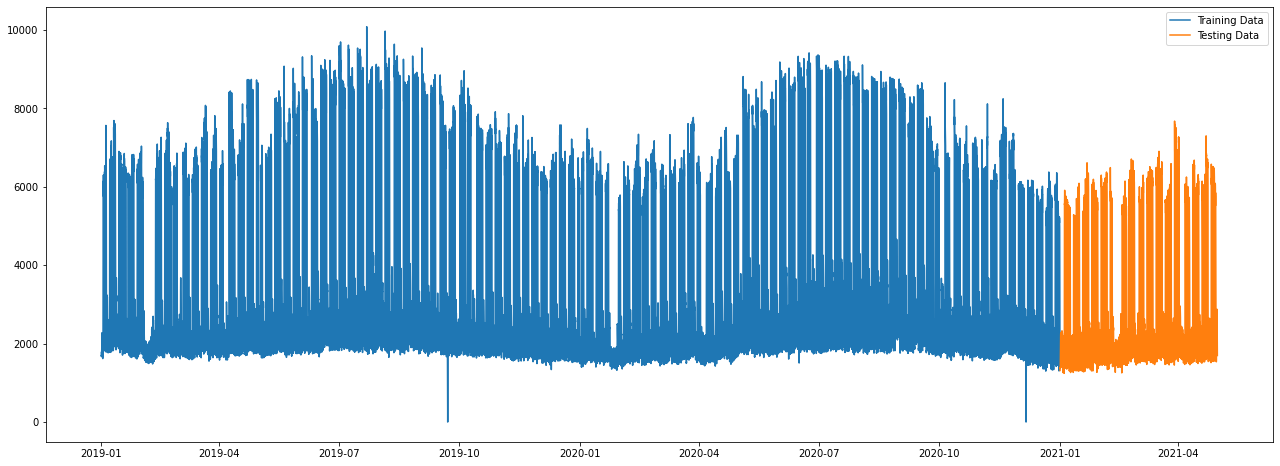

               Load
count  17544.000000
mean    3889.018194
std     2375.810779
min        0.000000
25%     1879.200000
50%     2716.800000
75%     6168.000000
max    10080.000000


In [ ]:
size = len(data) - 2880
fig = plt.figure(figsize = (22,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(load[:size], label = "Training Data")
ax.plot(load[size:], label = "Testing Data")
ax.legend()
plt.show()
print(load[:size].describe())

In [ ]:
# outliners?
load[load['Load']<1000]

,Load
2019-09-22 00:00:00,268.8
2019-09-22 01:00:00,0.0
2019-09-22 02:00:00,0.0
2019-09-22 03:00:00,472.8
2020-12-05 23:00:00,974.4
2020-12-06 00:00:00,240.0
2020-12-06 01:00:00,0.0
2020-12-06 02:00:00,0.0
2020-12-06 03:00:00,765.6


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# model: additive / multiplicative
decompose = seasonal_decompose(load, model = 'additive')

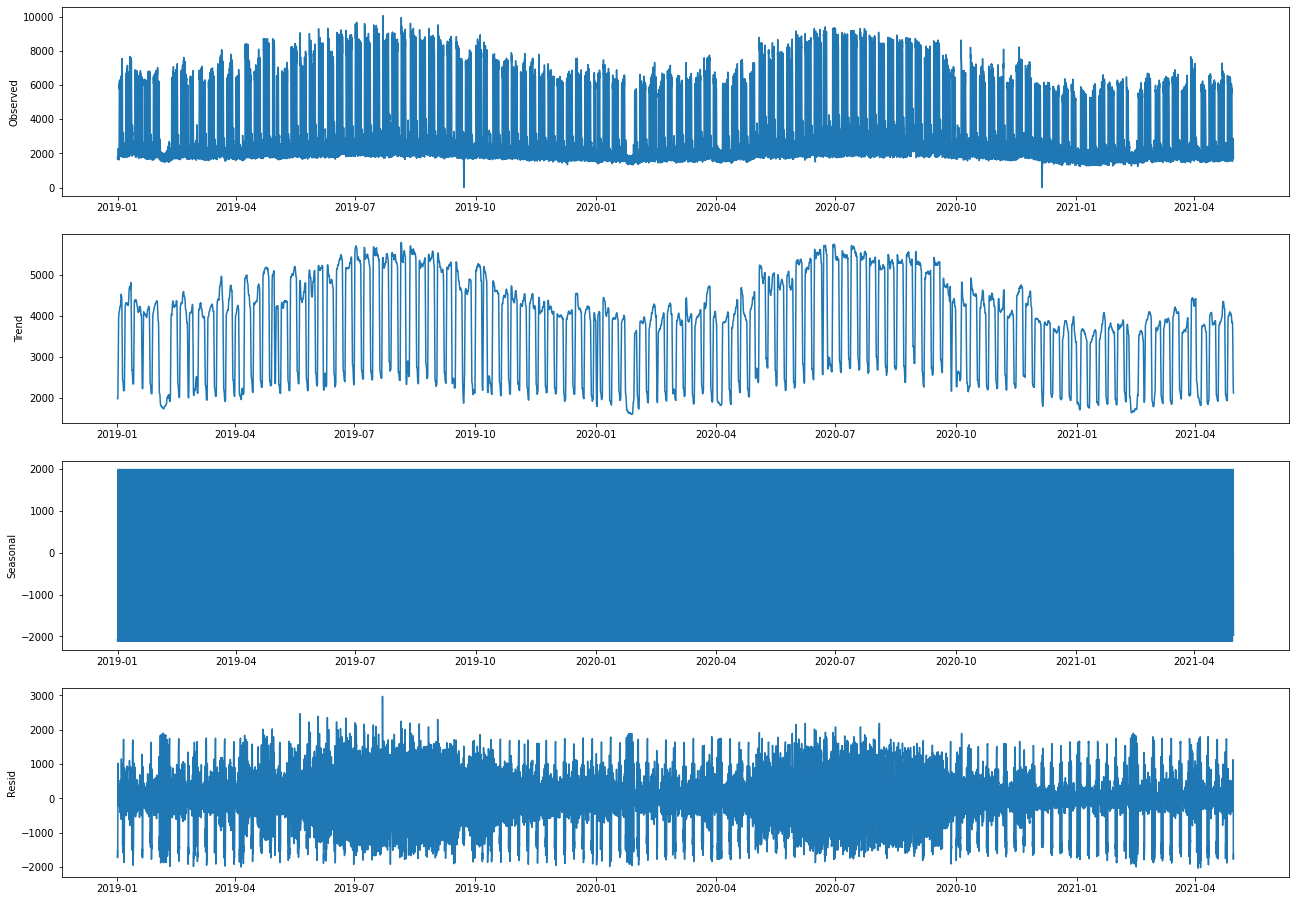

In [ ]:
fig = plt.figure(figsize = (22,16))
ax = fig.add_subplot(4, 1, 1)
ax.plot(decompose.observed)
ax.set_ylabel('Observed')

ax = fig.add_subplot(4, 1, 2)
ax.plot(decompose.trend)
ax.set_ylabel('Trend')

ax = fig.add_subplot(4, 1, 3)
ax.plot(decompose.seasonal)
ax.set_ylabel('Seasonal')

ax = fig.add_subplot(4, 1, 4)
ax.plot(decompose.resid)
ax.set_ylabel('Resid')

plt.show()

<AxesSubplot:>

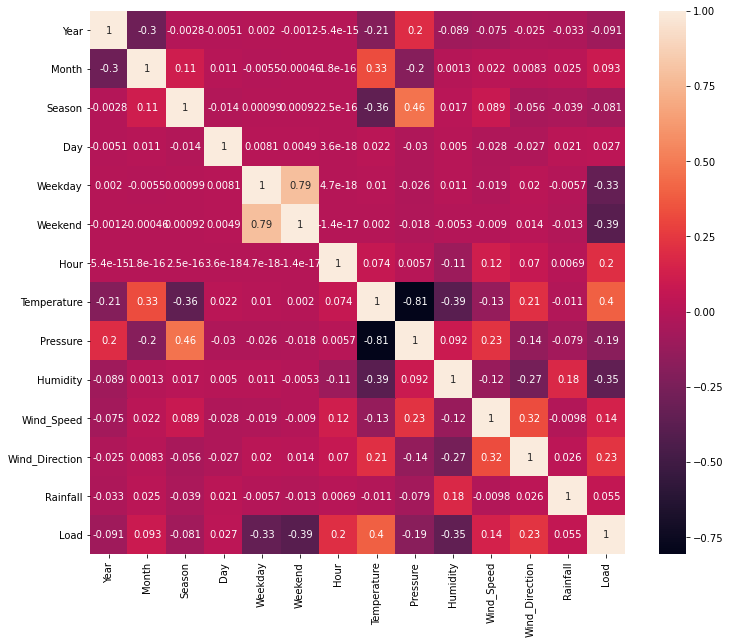

In [ ]:
data_corr = data.corr()
fig = plt.figure(figsize = (12, 10))
sns.heatmap(data_corr, annot = True)

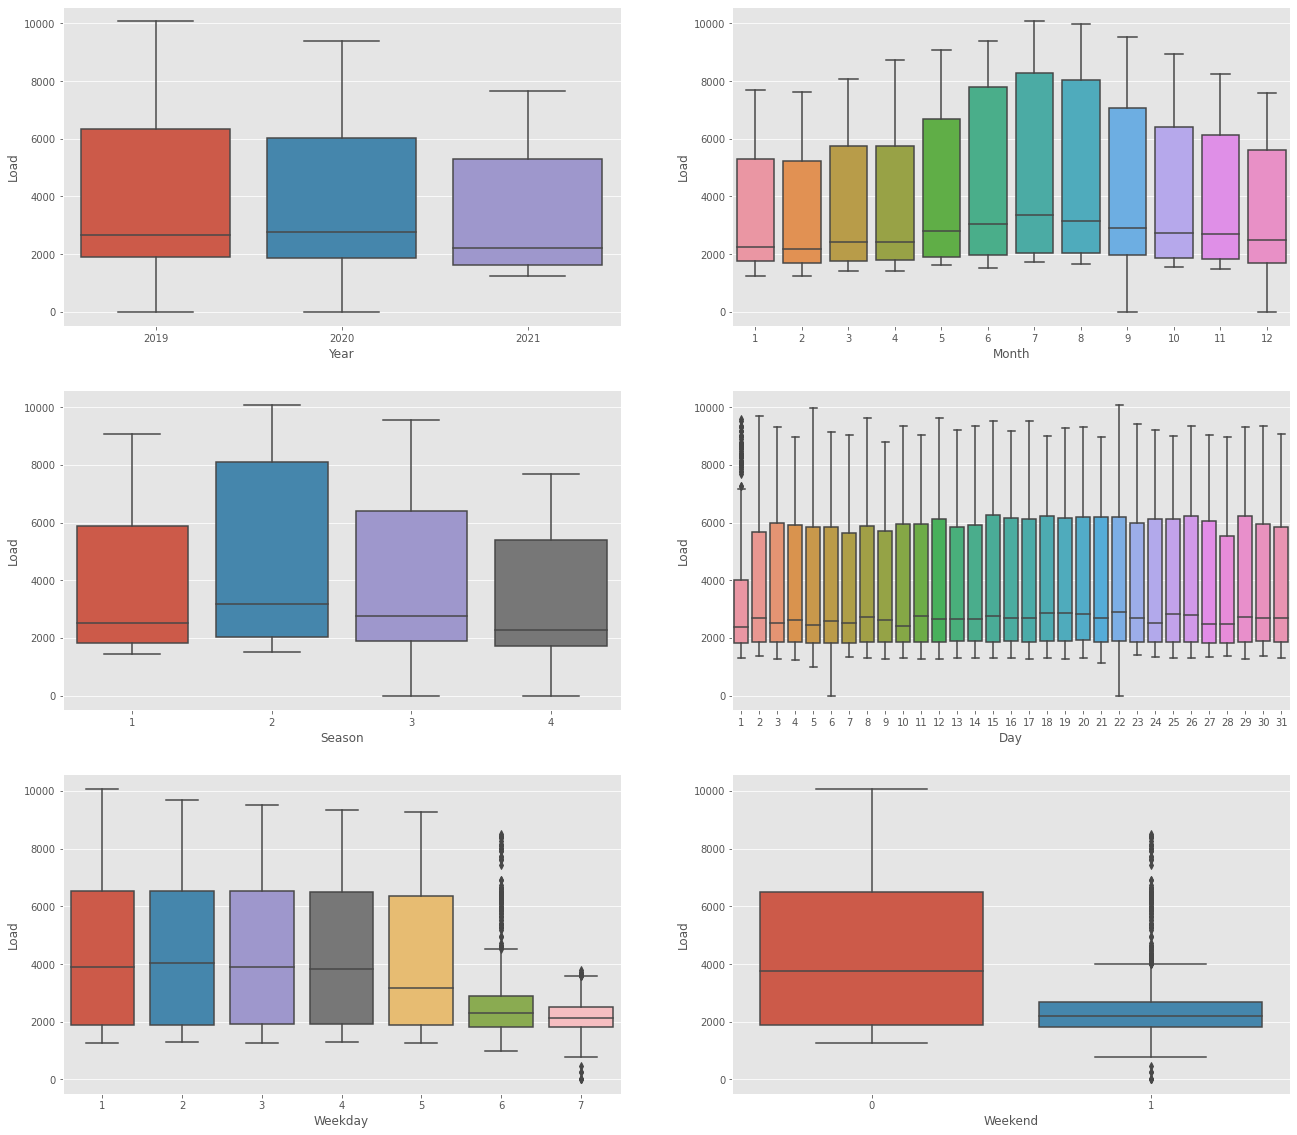

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (22,20))

ax = fig.add_subplot(3, 2, 1)
sns.boxplot(y = 'Load', x = 'Year', data = data)

ax = fig.add_subplot(3, 2, 2)
sns.boxplot(y = 'Load', x = 'Month', data = data)

ax = fig.add_subplot(3, 2, 3)
sns.boxplot(y = 'Load', x = 'Season', data = data)

ax = fig.add_subplot(3, 2, 4)
sns.boxplot(y = 'Load', x = 'Day', data = data)

ax = fig.add_subplot(3, 2, 5)
sns.boxplot(y = 'Load', x = 'Weekday', data = data)

ax = fig.add_subplot(3, 2, 6)
sns.boxplot(y = 'Load', x = 'Weekend', data = data)

plt.show()

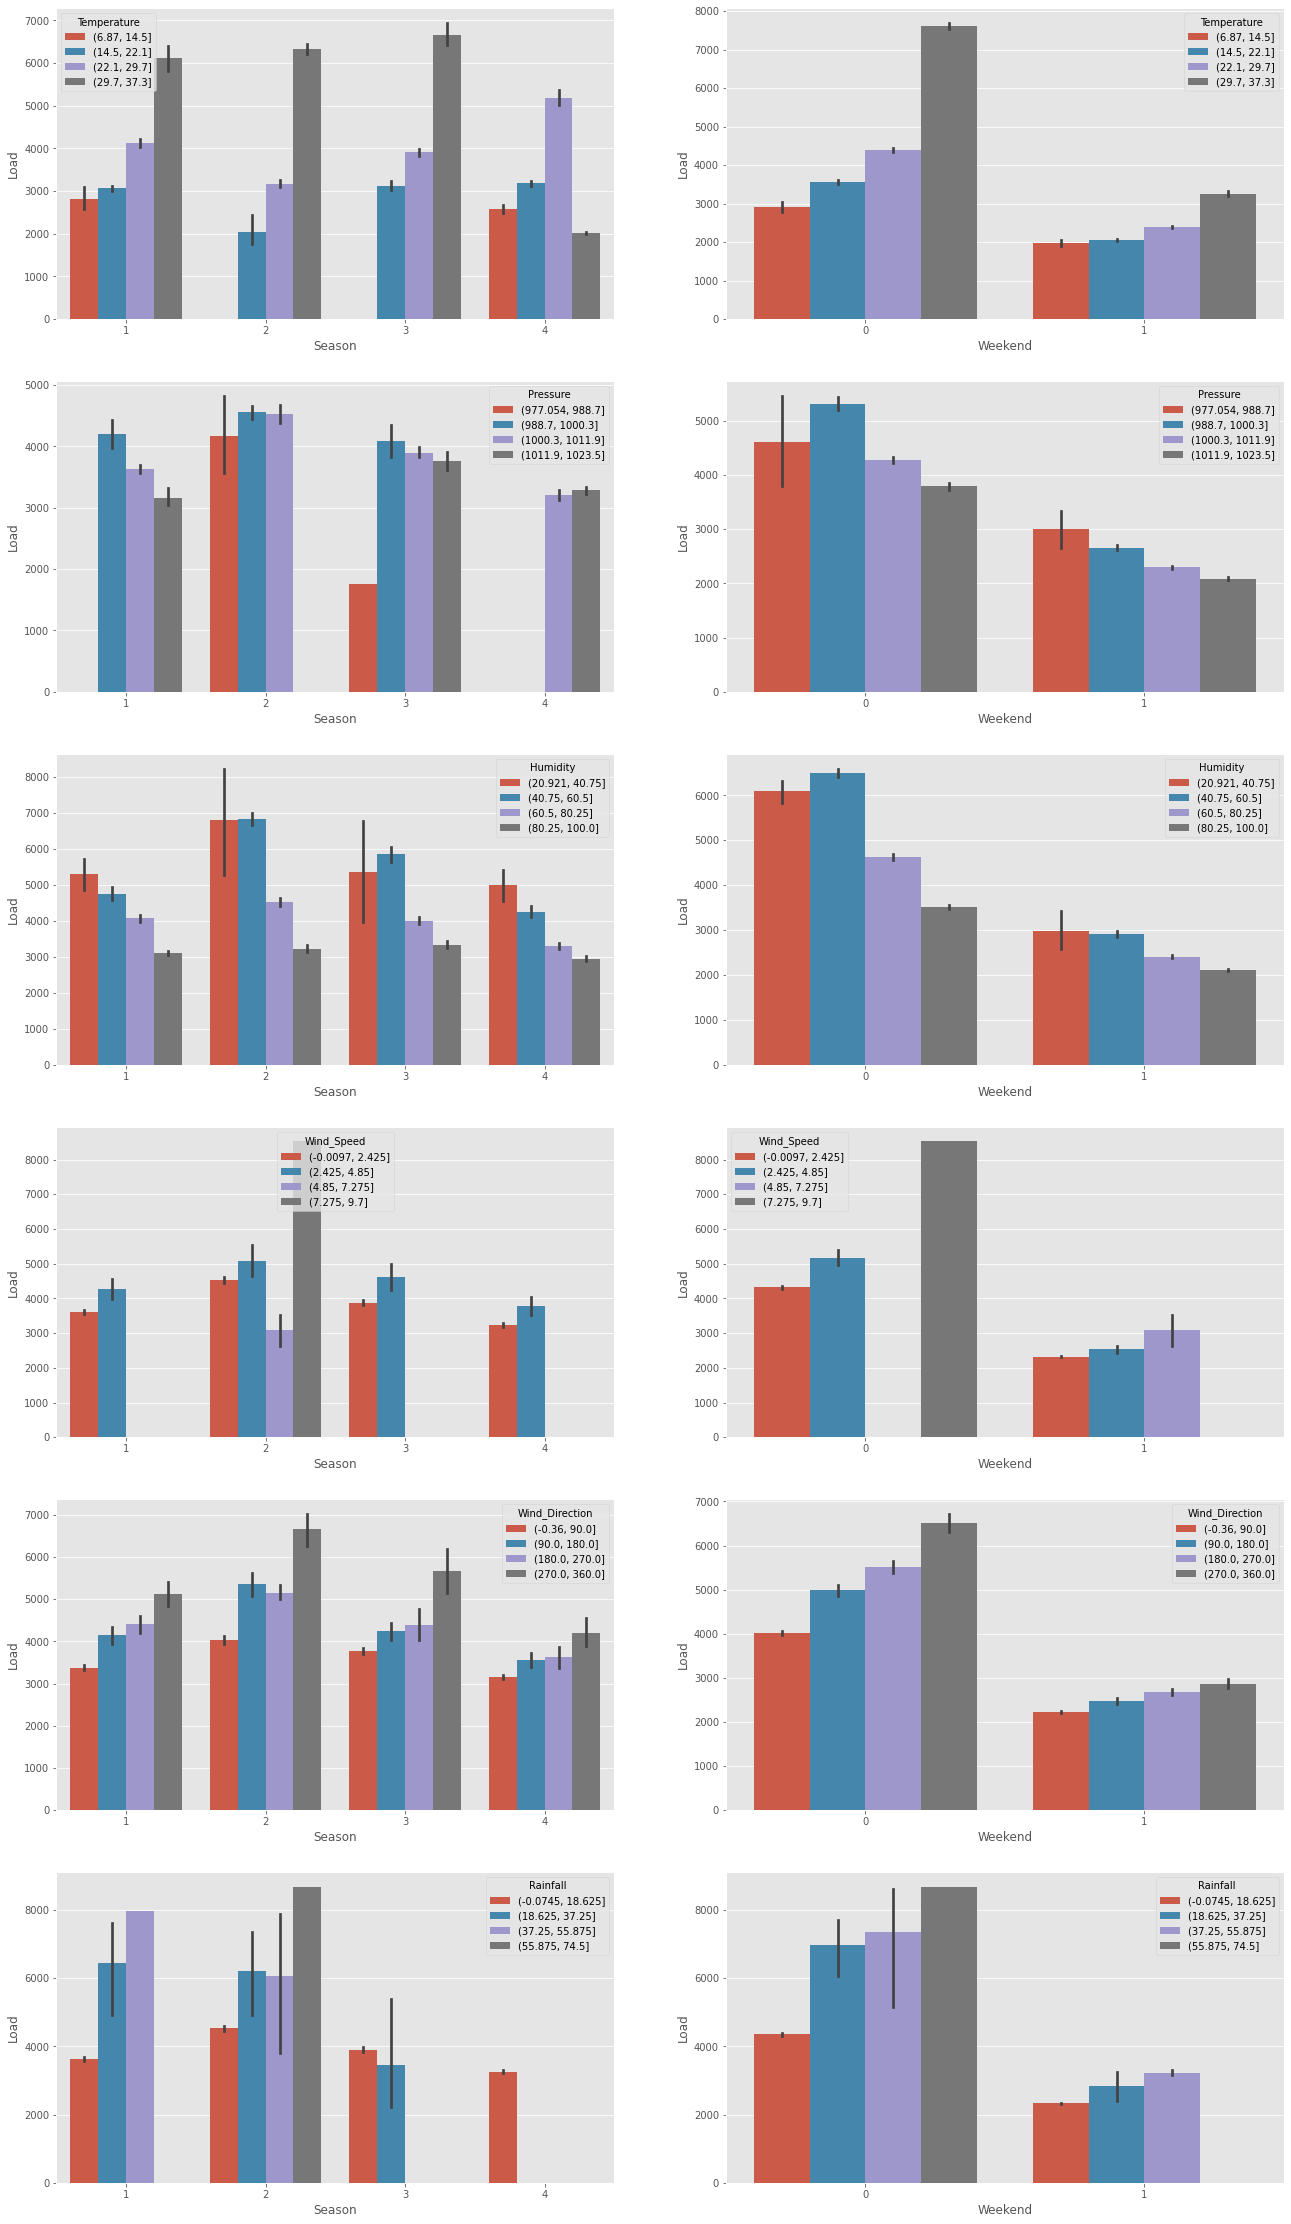

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (22,40))

ax = fig.add_subplot(6, 2, 1)
sns.barplot(y = 'Load', x = 'Season', hue = pd.cut(data.Temperature,4), data = data)
ax = fig.add_subplot(6, 2, 2)
sns.barplot(y = 'Load', x = 'Weekend', hue = pd.cut(data.Temperature,4), data = data)

ax = fig.add_subplot(6, 2, 3)
sns.barplot(y = 'Load', x = 'Season', hue = pd.cut(data.Pressure,4), data = data)
ax = fig.add_subplot(6, 2, 4)
sns.barplot(y = 'Load', x = 'Weekend', hue = pd.cut(data.Pressure,4), data = data)

ax = fig.add_subplot(6, 2, 5)
sns.barplot(y = 'Load', x = 'Season', hue = pd.cut(data.Humidity,4), data = data)
ax = fig.add_subplot(6, 2, 6)
sns.barplot(y = 'Load', x = 'Weekend', hue = pd.cut(data.Humidity,4), data = data)

ax = fig.add_subplot(6, 2, 7)
sns.barplot(y = 'Load', x = 'Season', hue = pd.cut(data.Wind_Speed,4), data = data)
ax = fig.add_subplot(6, 2, 8)
sns.barplot(y = 'Load', x = 'Weekend', hue = pd.cut(data.Wind_Speed,4), data = data)

ax = fig.add_subplot(6, 2, 9)
sns.barplot(y = 'Load', x = 'Season', hue = pd.cut(data.Wind_Direction,4), data = data)
ax = fig.add_subplot(6, 2, 10)
sns.barplot(y = 'Load', x = 'Weekend', hue = pd.cut(data.Wind_Direction,4), data = data)

ax = fig.add_subplot(6, 2, 11)
sns.barplot(y = 'Load', x = 'Season', hue = pd.cut(data.Rainfall,4), data = data)
ax = fig.add_subplot(6, 2, 12)
sns.barplot(y = 'Load', x = 'Weekend', hue = pd.cut(data.Rainfall,4), data = data)

plt.show()

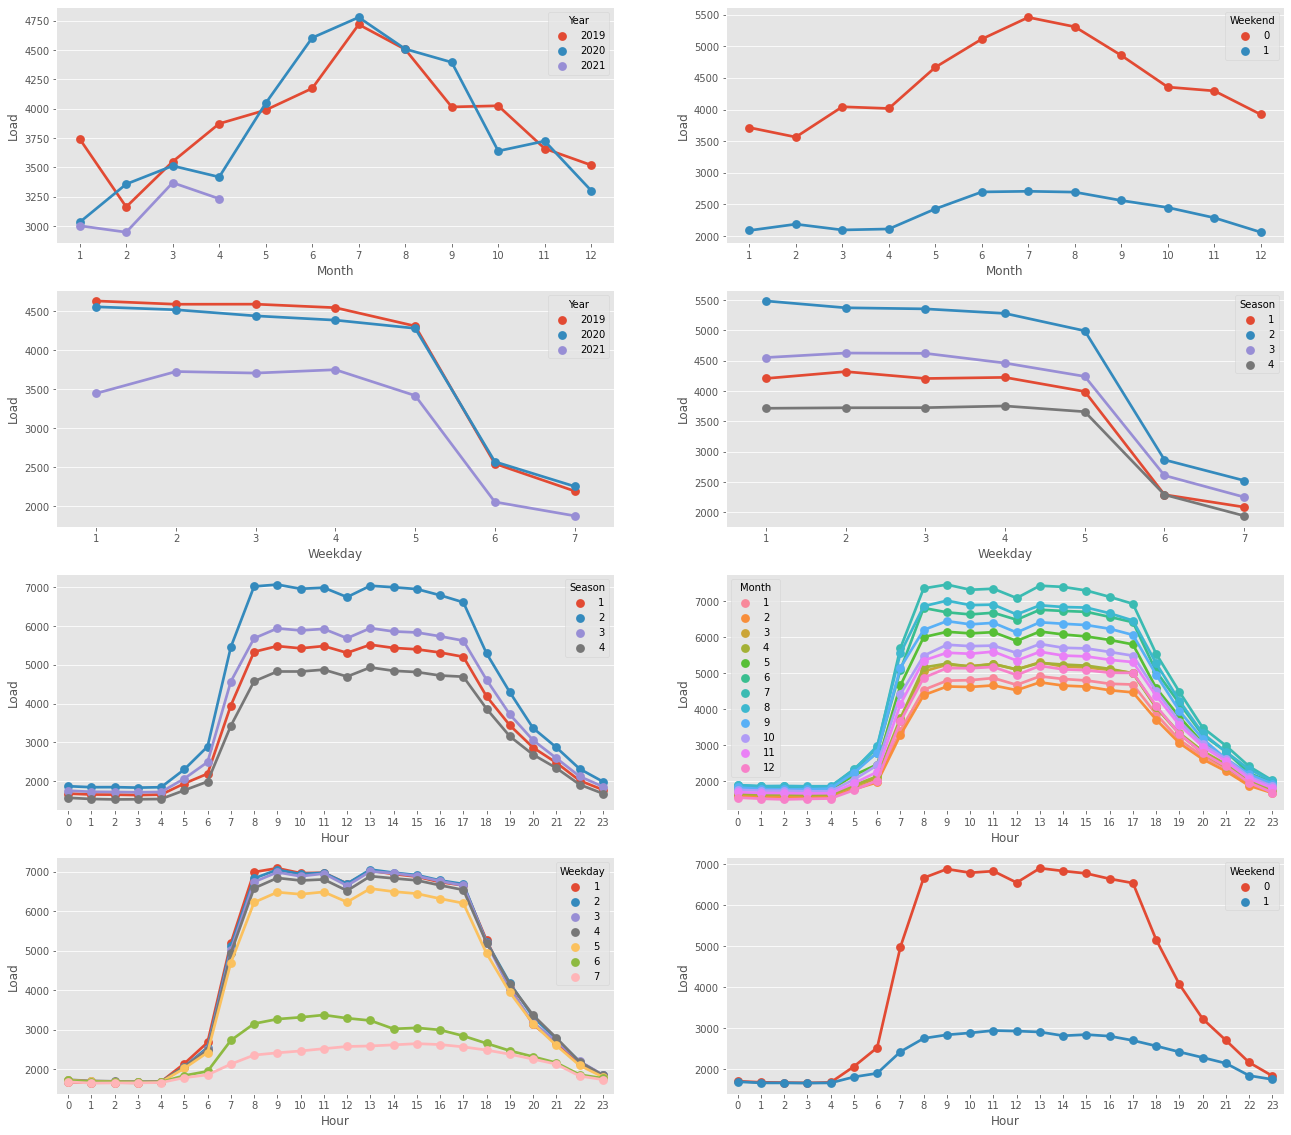

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (22,20))

ax = fig.add_subplot(4, 2, 1)
sns.pointplot(y = 'Load', x = 'Month', hue = 'Year', ci = None, data = data)
ax = fig.add_subplot(4, 2, 2)
sns.pointplot(y = 'Load', x = 'Month', hue = 'Weekend', ci = None, data = data)

ax = fig.add_subplot(4, 2, 3)
sns.pointplot(y = 'Load', x = 'Weekday', hue = 'Year', ci = None, data = data)
ax = fig.add_subplot(4, 2, 4)
sns.pointplot(y = 'Load', x = 'Weekday', hue = 'Season', ci = None, data = data)

ax = fig.add_subplot(4, 2, 5)
sns.pointplot(y = 'Load', x = 'Hour', hue = 'Season', ci = None, data = data)
ax = fig.add_subplot(4, 2, 6)
sns.pointplot(y = 'Load', x = 'Hour', hue = 'Month', ci = None, data = data)
ax = fig.add_subplot(4, 2, 7)
sns.pointplot(y = 'Load', x = 'Hour', hue = 'Weekday', ci = None, data = data)
ax = fig.add_subplot(4, 2, 8)
sns.pointplot(y = 'Load', x = 'Hour', hue = 'Weekend', ci = None, data = data)

plt.show()

# Preprocessing

## Deal with NA

In [ ]:
print(data.isnull().sum())

Year                0
Month               0
Season              0
Day                 0
Weekday             0
Weekend             0
Hour                0
Temperature       325
Pressure          325
Humidity          347
Wind_Speed        346
Wind_Direction    346
Rainfall          482
Load                0
dtype: int64


In [ ]:
# bfill / ffill /...
data = data.fillna(method = 'bfill')
print(data.isnull().sum())

Year              0
Month             0
Season            0
Day               0
Weekday           0
Weekend           0
Hour              0
Temperature       0
Pressure          0
Humidity          0
Wind_Speed        0
Wind_Direction    0
Rainfall          0
Load              0
dtype: int64


## Outliners

## Add Features

In [ ]:
# data['diff'] = data['DEWP'] - data['TEMP']

## Features Selection

In [ ]:
data = data.drop('Month',1)
data = data.drop('Weekday',1)

## Split Train & Test

In [ ]:
size = len(data) - 2880
train_data, test_data = data[0:size], data[size:]

In [ ]:
train_data

,Year,Month,Season,Day,Weekday,Weekend,Hour,Temperature,Pressure,Humidity,Wind_Speed,Wind_Direction,Rainfall,Load
0,2019,1,4,1,2,0,0,15.3,1020.3,97.0,2.0,77.0,0.5,1773.6
1,2019,1,4,1,2,0,1,15.3,1020.0,97.0,2.1,80.0,1.0,1675.2
2,2019,1,4,1,2,0,2,15.3,1019.4,97.0,2.3,78.0,0.5,1677.6
3,2019,1,4,1,2,0,3,15.3,1019.2,97.0,2.2,71.0,0.0,1706.4
4,2019,1,4,1,2,0,4,15.2,1019.2,97.0,1.9,76.0,0.5,1665.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2020,12,4,31,4,0,19,10.3,1020.7,59.0,0.2,0.0,0.0,3175.2
17540,2020,12,4,31,4,0,20,10.5,1020.6,58.0,0.7,105.0,0.0,2812.8
17541,2020,12,4,31,4,0,21,10.7,1020.2,59.0,0.8,83.0,0.0,2352.0
17542,2020,12,4,31,4,0,22,10.7,1020.0,63.0,0.7,92.0,0.0,1860.0


In [ ]:
test_data

,Year,Month,Season,Day,Weekday,Weekend,Hour,Temperature,Pressure,Humidity,Wind_Speed,Wind_Direction,Rainfall,Load
17544,2021,1,4,1,5,0,0,10.9,1019.7,61.0,0.2,0.0,0.0,1315.2
17545,2021,1,4,1,5,0,1,11.1,1019.5,60.0,0.4,67.0,0.0,1384.8
17546,2021,1,4,1,5,0,2,11.0,1018.8,61.0,1.0,63.0,0.0,1384.8
17547,2021,1,4,1,5,0,3,11.0,1018.8,61.0,0.9,80.0,0.0,1375.2
17548,2021,1,4,1,5,0,4,11.3,1018.7,62.0,0.9,73.0,0.0,1389.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20419,2021,4,1,30,5,0,19,24.1,1004.0,75.0,0.1,0.0,0.0,2404.8
20420,2021,4,1,30,5,0,20,23.4,1004.2,77.0,0.0,0.0,0.0,2275.2
20421,2021,4,1,30,5,0,21,22.8,1004.3,74.0,0.0,0.0,0.0,1987.2
20422,2021,4,1,30,5,0,22,22.5,1003.9,73.0,0.4,242.0,0.0,1720.8


## Split X & y

In [ ]:
train_y = train_data['Load']
train_X = train_data.drop('Load',1)

In [ ]:
test_y = test_data['Load']
test_X = test_data.drop('Load',1)

## Normalization

In [ ]:
# MinMaxScaler, StandardScaler
# normalize X and y?

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
train_X

array([[0.        , 0.        , 1.        , ..., 0.20618557, 0.21388889,
        0.00671141],
       [0.        , 0.        , 1.        , ..., 0.21649485, 0.22222222,
        0.01342282],
       [0.        , 0.        , 1.        , ..., 0.2371134 , 0.21666667,
        0.00671141],
       ...,
       [1.        , 1.        , 1.        , ..., 0.08247423, 0.23055556,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.07216495, 0.25555556,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
test_X = scaler.transform(test_X)
test_X

array([[2.        , 0.        , 1.        , ..., 0.02061856, 0.        ,
        0.        ],
       [2.        , 0.        , 1.        , ..., 0.04123711, 0.18611111,
        0.        ],
       [2.        , 0.        , 1.        , ..., 0.10309278, 0.175     ,
        0.        ],
       ...,
       [2.        , 0.27272727, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.        , 0.27272727, 0.        , ..., 0.04123711, 0.67222222,
        0.        ],
       [2.        , 0.27272727, 0.        , ..., 0.02061856, 0.        ,
        0.        ]])

# Model

## LSTM

In [ ]:
num = 12
train_y[num]

2224.8

In [ ]:
X_train = [] 
y_train = []
for i in range(num, len(train_X)):
    X_train.append(train_X[i-num:i-1]) 
    y_train.append(train_y[i]) 
X_train, y_train = np.array(X_train), np.array(y_train) 

In [ ]:
X_train.shape

(17532, 11, 13)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Flatten

In [ ]:
#LSTM
model_lstm = Sequential()

model_lstm.add(LSTM(100, input_shape = (X_train.shape[1],X_train.shape[2]), return_sequences = True))
model_lstm.add(LSTM(50, return_sequences = True))
model_lstm.add(TimeDistributed(Dense(1)))
model_lstm.add(Flatten())
model_lstm.add(Dense(5,activation = 'linear'))
model_lstm.add(Dense(1))

model_lstm.compile(loss = "mean_absolute_error", optimizer = "adam", metrics = ['mean_absolute_error'])
model_lstm.fit(X_train, y_train, epochs = 50, batch_size = 100)

Epoch 1/50
176/176 [==============================] - 2s 10ms/step - loss: 3801.4954 - mean_absolute_error: 3801.4954
Epoch 2/50
176/176 [==============================] - 2s 10ms/step - loss: 3232.6675 - mean_absolute_error: 3232.6675
Epoch 3/50
176/176 [==============================] - 2s 10ms/step - loss: 2090.5312 - mean_absolute_error: 2090.5312
Epoch 4/50
176/176 [==============================] - 2s 10ms/step - loss: 1914.9136 - mean_absolute_error: 1914.9136
Epoch 5/50
176/176 [==============================] - 2s 11ms/step - loss: 1912.1309 - mean_absolute_error: 1912.1309
Epoch 6/50
176/176 [==============================] - 2s 10ms/step - loss: 1912.0503 - mean_absolute_error: 1912.0503
Epoch 7/50
176/176 [==============================] - 2s 10ms/step - loss: 1912.0616 - mean_absolute_error: 1912.0616
Epoch 8/50
176/176 [==============================] - 2s 10ms/step - loss: 1911.8799 - mean_absolute_error: 1911.8799
Epoch 9/50
176/176 [==============================] - 2s

In [ ]:
# model_lstm.save(r'C:\Users\Hsuan\OneDrive - National Chiao Tung University\NYCUAIML\再生能源規劃\信義國泰\model\LSTM_v1(10).h5')

In [ ]:
# from keras.models import load_model
# model_lstm = load_model(r'C:\Users\Hsuan\OneDrive - National Chiao Tung University\Courses\Data Science Applications\final project\results\project2_lstm7(11).h5')

In [ ]:
num = 12

In [ ]:
X_test = [] 
for i in range(num,len(test_X)):
    X_test.append(test_X[i-num:i-1]) 
X_test = np.array(X_test)

In [ ]:
X_test.shape

(2868, 11, 13)

In [ ]:
pred_part1 = model_lstm.predict(X_train[-num:])
pred_part2 = model_lstm.predict(X_test)
pred = np.append(pred_part1,pred_part2)
prediction_lstm = [value for value in pred]

In [ ]:
print('MAE:', mean_absolute_error(test_y, prediction_lstm))
print('RMSE:', math.sqrt(mean_squared_error(test_y, prediction_lstm)))
print('MSE:', mean_squared_error(test_y, prediction_lstm))
measure_data = pd.DataFrame()
measure_data['LSTM'] = (mean_absolute_error(test_y, prediction_lstm), math.sqrt(mean_squared_error(test_y, prediction_lstm)), mean_squared_error(test_y, prediction_lstm))

MAE: 457.6606000942654
RMSE: 928.112225654373
MSE: 861392.3034091138


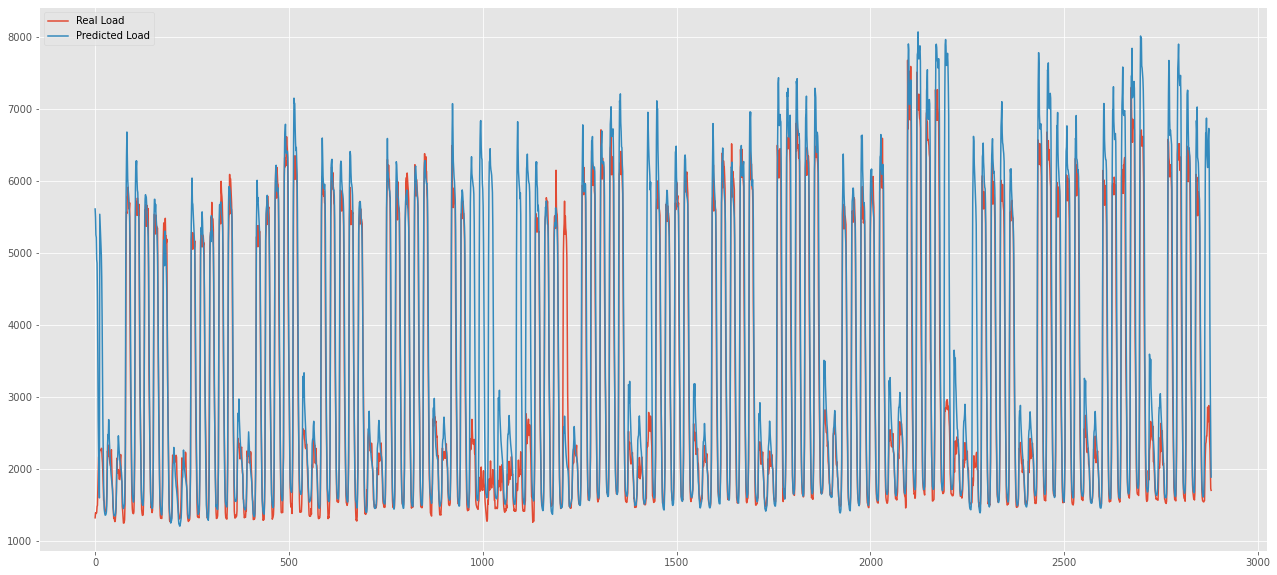

In [ ]:
# predition
fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(test_y), label = "Real Load")
ax.plot(prediction_lstm, label = "Predicted Load")
ax.legend()
plt.show()

In [ ]:
ans_data = pd.DataFrame(data[size:])
ans_data['Predicted_LSTM'] = prediction_lstm

## SVR

In [ ]:
from sklearn import svm
model_svm = svm.SVR()

In [ ]:
model_svm.fit(train_X, train_y)

SVR()

In [ ]:
pred = model_svm.predict(test_X)
prediction_SVR = [round(value) for value in pred]

In [ ]:
print('MAE:', mean_absolute_error(test_y, prediction_SVR))
print('RMSE:', math.sqrt(mean_squared_error(test_y, prediction_SVR)))
print('MSE:', mean_squared_error(test_y, prediction_SVR))
measure_data['SVR'] = (mean_absolute_error(test_y, prediction_SVR), math.sqrt(mean_squared_error(test_y, prediction_SVR)), mean_squared_error(test_y, prediction_SVR))

MAE: 1421.5368055555555
RMSE: 1795.8118437383998
MSE: 3224940.1781111113


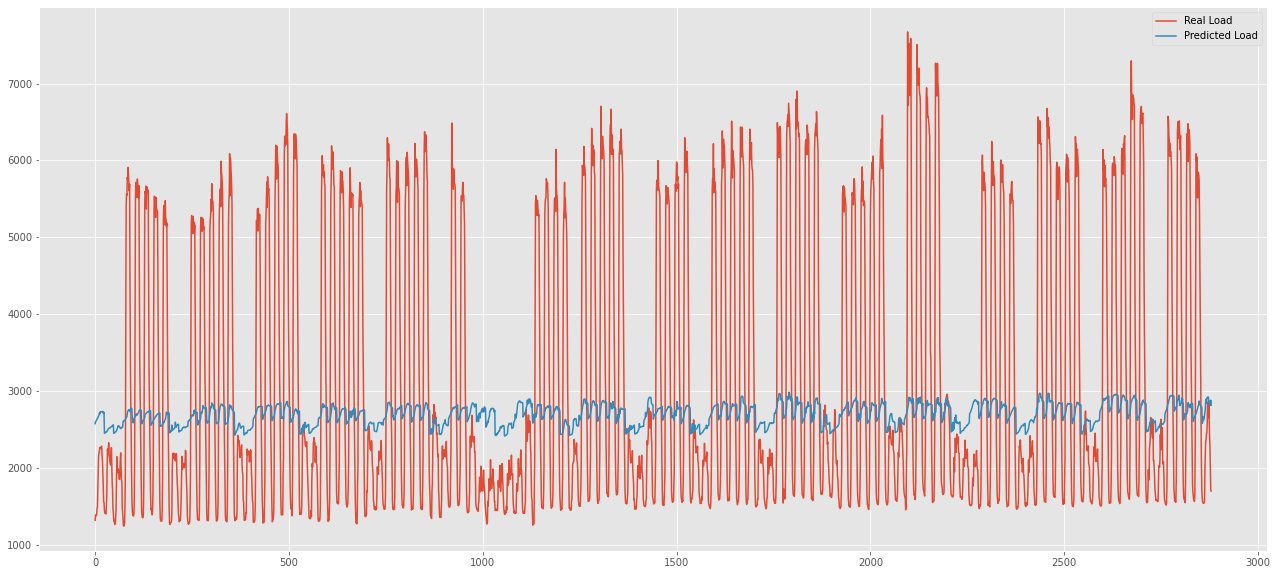

In [ ]:
# predition
fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(test_y), label = "Real Load")
ax.plot(prediction_SVR, label = "Predicted Load")
ax.legend()
plt.show()

In [ ]:
ans_data['Predicted_SVR'] = prediction_SVR

## RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
model_rf.fit(train_X, train_y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
pred = model_rf.predict(test_X)
prediction_rf = [round(value) for value in pred]

In [ ]:
print('MAE:', mean_absolute_error(test_y, prediction_rf))
print('RMSE:', math.sqrt(mean_squared_error(test_y, prediction_rf)))
print('MSE:', mean_squared_error(test_y, prediction_rf))
measure_data['RF'] = (mean_absolute_error(test_y, prediction_rf), math.sqrt(mean_squared_error(test_y, prediction_rf)), mean_squared_error(test_y, prediction_rf))

MAE: 398.2888888888889
RMSE: 820.5245791903832
MSE: 673260.5850555554


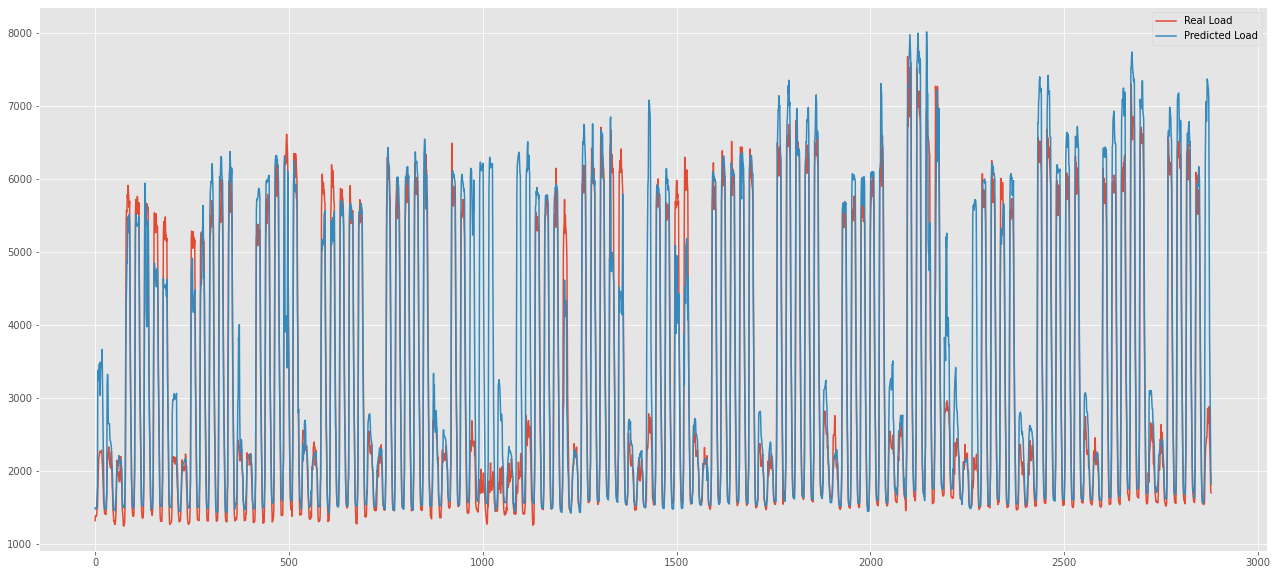

In [ ]:
# predition
fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(test_y), label = "Real Load")
ax.plot(prediction_rf, label = "Predicted Load")
ax.legend()
plt.show()

In [ ]:
ans_data['Predicted_RF'] = prediction_rf

## XGBoost

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

In [ ]:
model_xgb.fit(train_X, train_y)

C:\Users\Hsuan\anaconda3\envs\DL\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = model_xgb.predict(test_X)
prediction_xgb = [round(value) for value in pred]

In [ ]:
print('MAE:', mean_absolute_error(test_y, prediction_xgb))
print('RMSE:', math.sqrt(mean_squared_error(test_y, prediction_xgb)))
print('MSE:', mean_squared_error(test_y, prediction_xgb))
measure_data['XGBoost'] = (mean_absolute_error(test_y, prediction_xgb), math.sqrt(mean_squared_error(test_y, prediction_xgb)), mean_squared_error(test_y, prediction_xgb))

MAE: 758.4830555555557
RMSE: 1356.015247189762
MSE: 1838777.3506111111


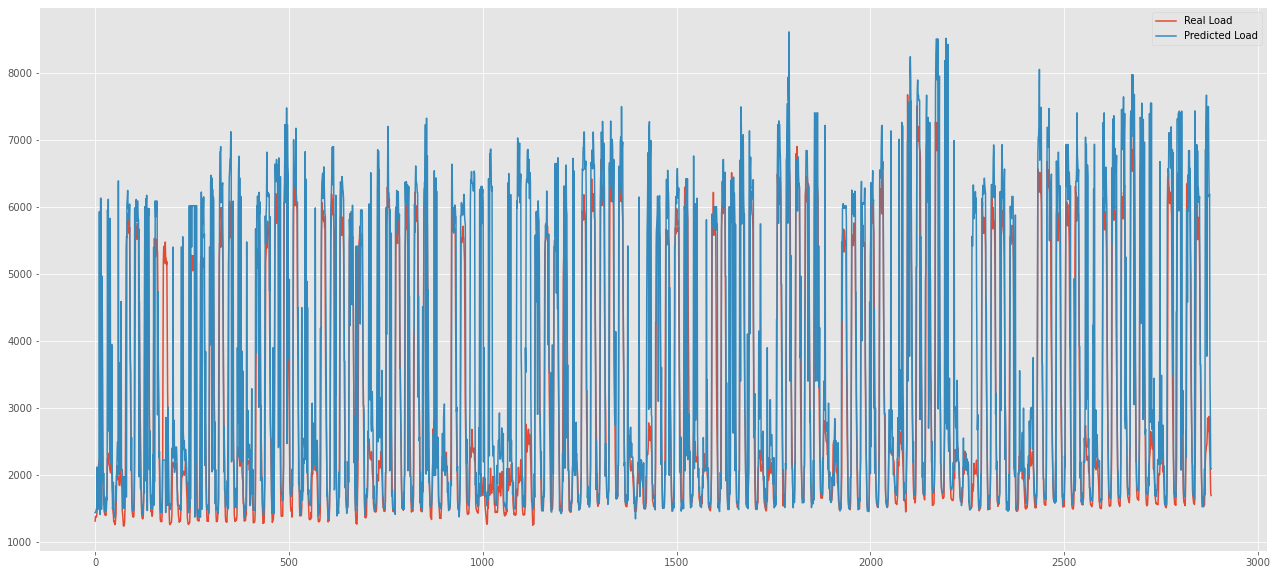

In [ ]:
# predition
fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.array(test_y), label = "Real Load")
ax.plot(prediction_xgb, label = "Predicted Load")
ax.legend()
plt.show()

In [ ]:
ans_data['Predicted_XGBoost'] = prediction_xgb

## ARIMA

In [ ]:
#a function to evaluate the ARIMA model
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = len(train_X)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order = arima_order) #call ARIMA 
        model_fit = model.fit(disp = 0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    result ={}
    result['model_fit'] = model_fit
    result['mse'] = mse
    result['mae'] = mae
    result['prediction'] = predictions
    result['test'] = test
    result['train'] = train
    result['acc'] = accuracy_score(round(pd.Series((v[0] for v in test))),round(pd.Series((v[0] for v in predictions))))
    return result

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    acc = mse['acc']
                    mse = mse['mse']
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA'+str(order)+' MSE= '+str(mse)+' and ACCURACY= '+str(acc))
                except:
                    continue
    print('Best ARIMA %s MSE= %.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p = [0, 1, 2, 4, 6, 8, 10]
d = range(0, 3)
q = range(0, 3)
#evaluate_models(df, p, d, q) #ARIMA(1, 0, 0)

In [ ]:
model_arima = evaluate_arima_model(load.values,(1,0,0))
model_fit = model_arima['model_fit']
# save model
#model_fit.save('model.pkl')

C:\Users\Hsuan\anaconda3\envs\DL\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Hsuan\anaconda3\envs\DL\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

TypeError: can only concatenate str (not "numpy.float64") to str

In [ ]:
print("MAE: " + str(model_arima['mae']))
print("RMSE: " + str(math.sqrt(model_arima['mse'])))
print("MSE: " + str(model_arima['mse']))
measure_data['ARIMA'] = (str(model_arima['mae']), str(math.sqrt(model_arima['mse'])), str(model_arima['mse']))

MAE: 330.66820486227346
RMSE: 545.3032840690189
MSE: 297355.67161645717


In [ ]:
prediction_arima = pd.Series( (v[0] for v in model_arima['prediction']))

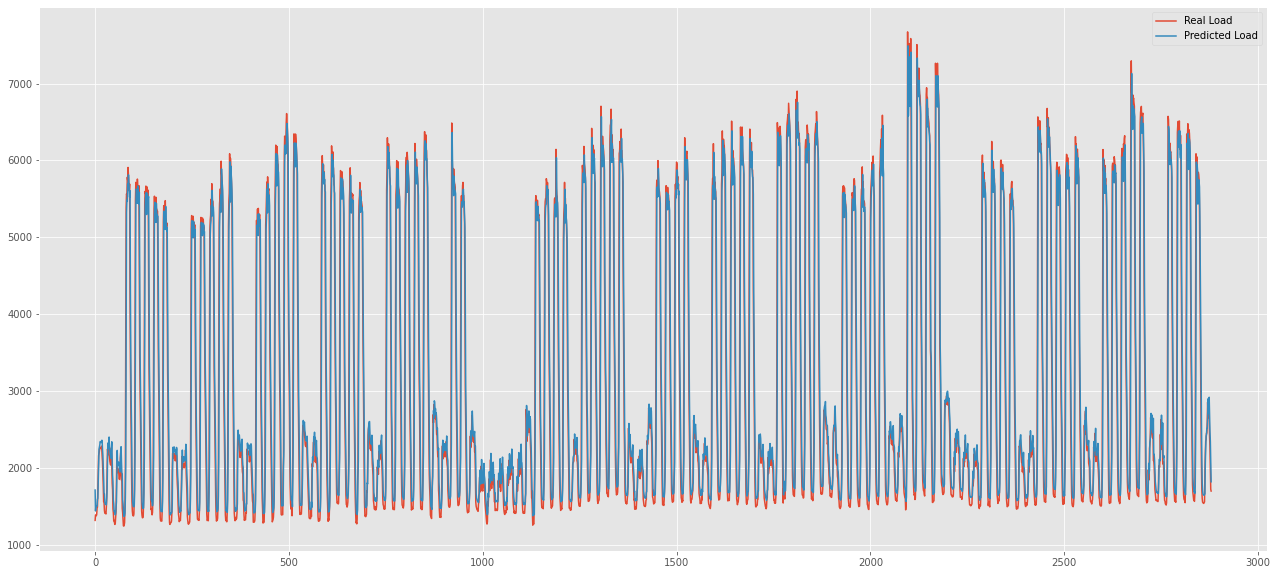

In [ ]:
# predition
fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.array(test_y), label = "Real Load")
ax.plot(prediction_arima, label = "Predicted Load")
ax.legend()
plt.show()

In [ ]:
ans_data['Predicted_ARIMA'] = np.array(prediction_arima)

# Figure

In [ ]:
# MAE RMSE MSE 
# measure_data
measure_data.loc[0,:]

LSTM                 457.6606
SVR               1421.536806
RF                 398.288889
XGBoost            758.483056
ARIMA      330.66820486227346
Name: 0, dtype: object

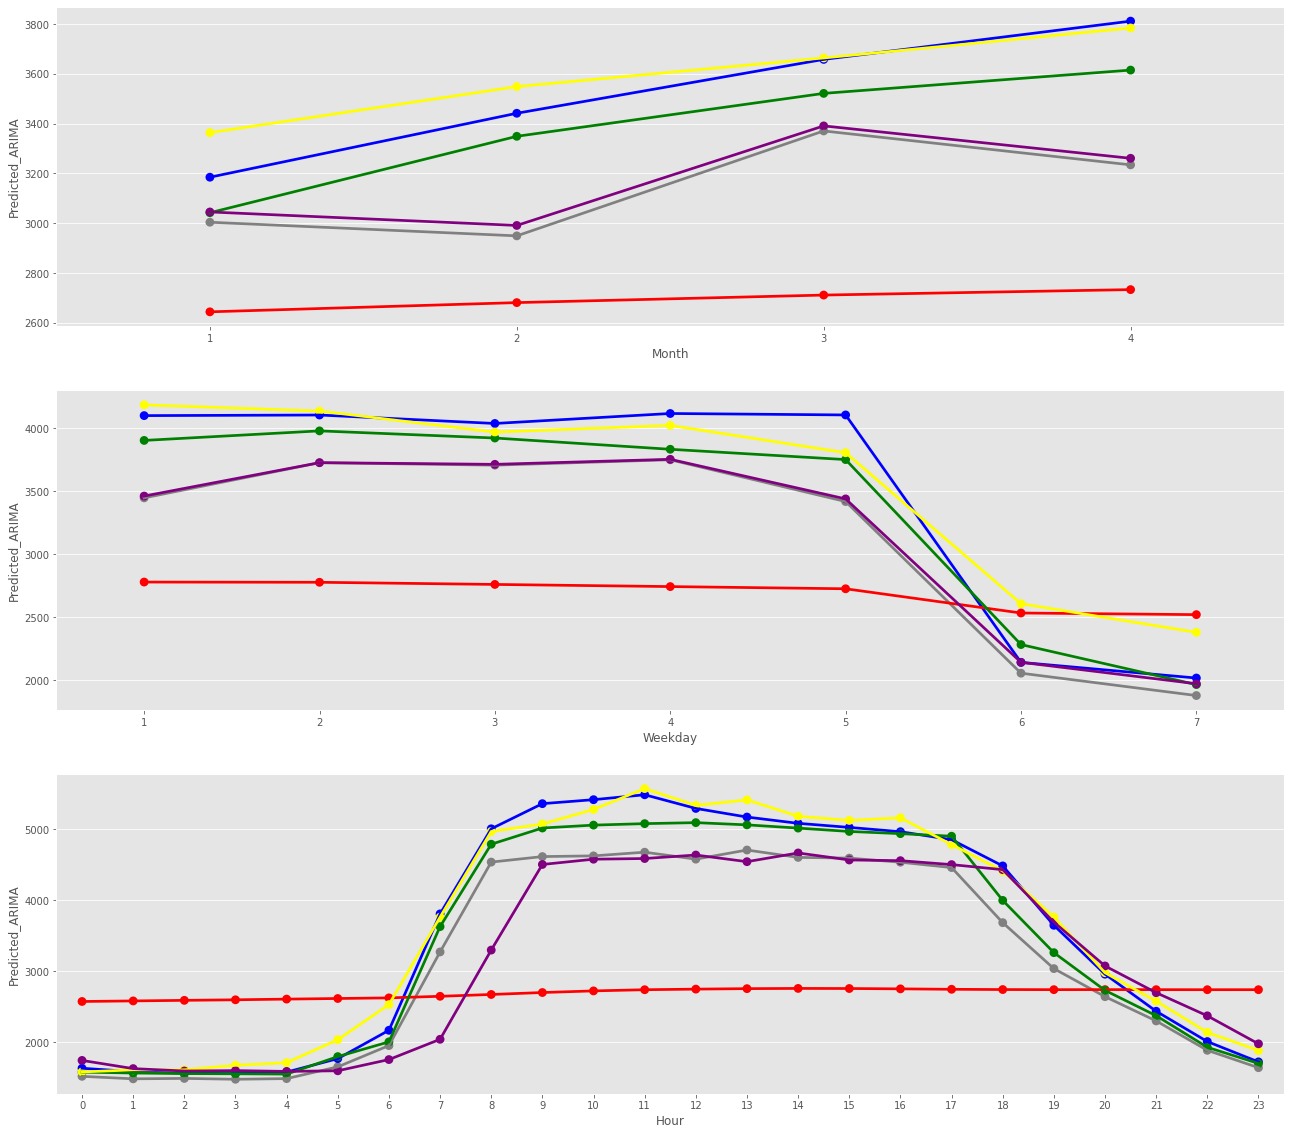

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (22,20))

ax = fig.add_subplot(3, 1, 1)
sns.pointplot(y = 'Load', x = 'Month', ci = None, data = ans_data, color = 'Gray')
sns.pointplot(y = 'Predicted_LSTM', x = 'Month', ci = None, data = ans_data, color = 'Blue')
sns.pointplot(y = 'Predicted_SVR', x = 'Month', ci = None, data = ans_data, color = 'Red')
sns.pointplot(y = 'Predicted_RF', x = 'Month', ci = None, data = ans_data, color = 'Green')
sns.pointplot(y = 'Predicted_XGBoost', x = 'Month', ci = None, data = ans_data, color = 'Yellow')
sns.pointplot(y = 'Predicted_ARIMA', x = 'Month', ci = None, data = ans_data, color = 'Purple')

ax = fig.add_subplot(3, 1, 2)
sns.pointplot(y = 'Load', x = 'Weekday', ci = None, data = ans_data, color = 'Gray')
sns.pointplot(y = 'Predicted_LSTM', x = 'Weekday', ci = None, data = ans_data, color = 'Blue')
sns.pointplot(y = 'Predicted_SVR', x = 'Weekday', ci = None, data = ans_data, color = 'Red')
sns.pointplot(y = 'Predicted_RF', x = 'Weekday', ci = None, data = ans_data, color = 'Green')
sns.pointplot(y = 'Predicted_XGBoost', x = 'Weekday', ci = None, data = ans_data, color = 'Yellow')
sns.pointplot(y = 'Predicted_ARIMA', x = 'Weekday', ci = None, data = ans_data, color = 'Purple')

ax = fig.add_subplot(3, 1, 3)
sns.pointplot(y = 'Load', x = 'Hour', ci = None, data = ans_data, color = 'Gray')
sns.pointplot(y = 'Predicted_LSTM', x = 'Hour', ci = None, data = ans_data, color = 'Blue')
sns.pointplot(y = 'Predicted_SVR', x = 'Hour', ci = None, data = ans_data, color = 'Red')
sns.pointplot(y = 'Predicted_RF', x = 'Hour', ci = None, data = ans_data, color = 'Green')
sns.pointplot(y = 'Predicted_XGBoost', x = 'Hour', ci = None, data = ans_data, color = 'Yellow')
sns.pointplot(y = 'Predicted_ARIMA', x = 'Hour', ci = None, data = ans_data, color = 'Purple')

plt.show()

# Output

In [ ]:
ans = pd.DataFrame({'Predicted':prediction})

In [ ]:
ans

In [ ]:
# ans.to_csv(r'C:\Users\Hsuan\OneDrive - National Chiao Tung University\NYCUAIML\再生能源規劃\信義國泰\LSTM_v1(10).csv',index=False)

In [ ]:
# four month
plt.plot(test_y)
plt.plot(prediction)
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()

In [ ]:
# one month
plt.plot(np.array(test_y)[:24*30])
plt.plot(prediction[:24*30])
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()

In [ ]:
# one week
plt.plot(np.array(test_y)[:24*7*3])
plt.plot(prediction[:24*7*3])
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()

In [ ]:
# one day
plt.plot(np.array(test_y)[:24])
plt.plot(prediction[:24])
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()

In [ ]:
# predict three days later
print('MAE:', MAE(test_y[24*3:], prediction[:-24*3]))
print('MSE:', MSE(test_y[24*3:], prediction[:-24*3]))
print('RMSE:', RMSE(test_y[24*3:], prediction[:-24*3]))

In [ ]:
# one month
plt.plot(np.array(test_y[24*3:])[:24*30])
plt.plot(prediction[:-24*3][:24*30])
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()

In [ ]:
# predict four days before
print('MAE:', MAE(test_y[:-24*4], prediction[24*4:]))
print('MSE:', MSE(test_y[:-24*4], prediction[24*4:]))
print('RMSE:', RMSE(test_y[:-24*4], prediction[24*4:]))

In [ ]:
# one month
plt.plot(np.array(test_y[:-24*4])[:24*30])
plt.plot(prediction[24*4:][:24*30])
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()